##### Copyright 2020 Google

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with qsimcirq

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/qsim/tutorials/qsimcirq"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/qsim/blob/master/docs/tutorials/qsimcirq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/qsim/blob/master/docs/tutorials/qsimcirq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/qsim/docs/tutorials/qsimcirq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

The qsim library provides a Python interface to Cirq in the **qsimcirq** PyPI package.

## Setup

Install the Cirq and qsimcirq packages:

In [1]:
try:
    import cirq
except ImportError:
    !pip install cirq --quiet
    import cirq

try:
    import qsimcirq
except ImportError:
    !pip install qsimcirq --quiet
    import qsimcirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [20]:
import cirq
import qsimcirq

def main():
    # 1. Создать один кубит
    qubit = cirq.LineQubit(1)

    # 2. Создать квантовую схему с явным именем измерения
    circuit = cirq.Circuit(
        cirq.X(qubit),  # Применяем вентиль Паули X
        cirq.measure(qubit, key="result")  # Измеряем кубит и сохраняем в "result"
    )

    print("Квантовая схема:")
    print(circuit)

    # 3. Использование симулятора qsimcirq
    simulator = qsimcirq.QSimSimulator()

    # 4. Запуск симуляции
    result = simulator.run(circuit, repetitions=5000)

    # 5. Анализ результатов
    print("Результаты измерений:")
    print(result.histogram(key="result"))  # Теперь используем правильный ключ

if __name__ == "__main__":
    main()


Квантовая схема:
1: ───X───M('result')───
Результаты измерений:
Counter({1: 5000})


In [4]:
# 1 лаба
import cirq
import qsimcirq

# 1. Создаем кубиты
qubit = cirq.GridQubit(0, 0)

# 2. Создаем квантовую схему
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit))  # Применяем вентиль Паули X
circuit.append(cirq.measure(qubit, key='result'))  # Измеряем кубит

print("Квантовая схема:")
print(circuit)

# 3. Компилируем программу в формат qsimcirq
qsim_circuit = qsimcirq.QSimCircuit(circuit)

# 4. Запускаем на симуляторе
simulator = qsimcirq.QSimSimulator()
result = simulator.run(qsim_circuit, repetitions=1000)

# 5. Анализируем результаты
counts = result.histogram(key='result')
print(f'Результаты измерений: {counts}')

Квантовая схема:
(0, 0): ───X───M('result')───
Результаты измерений: Counter({1: 1000})


In [6]:
# 2 лаба
import cirq
import qsimcirq

# 1. Создаем кубиты (3 кубита для телепортации)
qubits = [cirq.GridQubit(0, i) for i in range(3)]

# 2. Создаем квантовую схему
circuit = cirq.Circuit()

# 3. Создаем запутанное состояние между вторым и третьим кубитами
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.CNOT(qubits[1], qubits[2]))

# 4. Подготавливаем состояние на первом кубите
circuit.append(cirq.X(qubits[0]))  # Можно поменять на любое другое состояние

# 5. Применяем операции Белла
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.H(qubits[0]))

# 6. Измеряем первые два кубита
circuit.append(cirq.measure(qubits[0], key='m0'))
circuit.append(cirq.measure(qubits[1], key='m1'))

# 7. Применяем операции восстановления на третьем кубите
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.CZ(qubits[0], qubits[2]))

print("Квантовая схема:")
print(circuit)

# 8. Компилируем программу в формат qsimcirq
qsim_circuit = qsimcirq.QSimCircuit(circuit)

# 9. Запускаем на симуляторе
simulator = qsimcirq.QSimSimulator()
result = simulator.run(qsim_circuit, repetitions=1000)

# 10. Анализируем результаты
counts_m0 = result.histogram(key='m0')
counts_m1 = result.histogram(key='m1')
print(f'Результаты измерений m0: {counts_m0}')
print(f'Результаты измерений m1: {counts_m1}')


Квантовая схема:
(0, 0): ───X───────@───H─────────M('m0')───@───
                   │                       │
(0, 1): ───H───@───X───M('m1')───@─────────┼───
               │                 │         │
(0, 2): ───────X─────────────────X─────────@───
Результаты измерений m0: Counter({1: 508, 0: 492})
Результаты измерений m1: Counter({1: 517, 0: 483})


In [9]:
# 3 лаба:
import cirq
import qsimcirq

# 1. Создаем кубиты (один рабочий и один вспомогательный)
qubits = [cirq.GridQubit(0, i) for i in range(2)]

# 2. Создаем квантовую схему
circuit = cirq.Circuit()

# 3. Применяем Hadamard к обоим кубитам
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))

# 4. Добавляем оракул (функция f может быть постоянной или сбалансированной)
def deutsch_jozsa_oracle(qubits, constant=True):
    if not constant:
        circuit.append(cirq.CNOT(qubits[0], qubits[1]))
    # Если функция постоянная, не делаем ничего (или применяем X ко второму кубиту)

deutsch_jozsa_oracle(qubits, constant=False)

# 5. Применяем Hadamard к первому кубиту после оракула
circuit.append(cirq.H(qubits[0]))

# 6. Измеряем первый кубит
circuit.append(cirq.measure(qubits[0], key='result'))

print("Квантовая схема:")
print(circuit)

# 7. Компилируем программу в формат qsimcirq
qsim_circuit = qsimcirq.QSimCircuit(circuit)

# 8. Запускаем на симуляторе
simulator = qsimcirq.QSimSimulator()
result = simulator.run(qsim_circuit, repetitions=1000)

# 9. Анализируем результаты
counts = result.histogram(key='result')
print(f'Результаты измерений: {counts}')

Квантовая схема:
(0, 0): ───H───@───H───M('result')───
               │
(0, 1): ───H───X─────────────────────
Результаты измерений: Counter({0: 1000})


Квантовая схема:
(0, 0): ───H───X───X───X───H───X───@───X───H───M('result')───
                   │               │           │
(0, 1): ───H───────@───H───X───────@───X───H───M─────────────
                   │               │           │
(0, 2): ───H───────@───H───X───────X───X───H───M─────────────
Результаты измерений: Counter({4: 142, 3: 132, 5: 131, 2: 129, 1: 120, 0: 117, 6: 116, 7: 113})


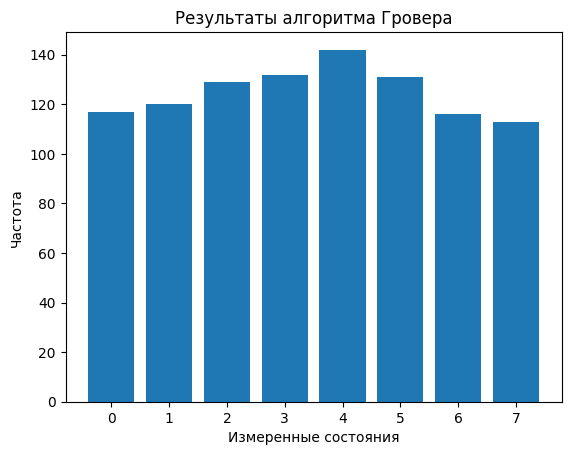

In [11]:
# 4 лаба
import cirq
import qsimcirq
import matplotlib.pyplot as plt

# 1. Создаем кубиты (3 кубита для алгоритма Гровера)
qubits = [cirq.GridQubit(0, i) for i in range(3)]

# 2. Создаем квантовую схему
circuit = cirq.Circuit()

# 3. Применяем Hadamard ко всем кубитам
circuit.append(cirq.H.on_each(*qubits))

# 4. Оракул Гровера (поиск состояния |101⟩)
def grover_oracle(qubits):
    circuit.append(cirq.X(qubits[0]))
    circuit.append(cirq.CCX(qubits[1], qubits[2], qubits[0]))
    circuit.append(cirq.X(qubits[0]))

grover_oracle(qubits)

# 5. Амплитудное усиление (диффузионный оператор)
circuit.append(cirq.H.on_each(*qubits))
circuit.append(cirq.X.on_each(*qubits))
circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
circuit.append(cirq.X.on_each(*qubits))
circuit.append(cirq.H.on_each(*qubits))

# 6. Измеряем кубиты
circuit.append(cirq.measure(*qubits, key='result'))

print("Квантовая схема:")
print(circuit)

# 7. Компилируем программу в формат qsimcirq
qsim_circuit = qsimcirq.QSimCircuit(circuit)

# 8. Запускаем на симуляторе
simulator = qsimcirq.QSimSimulator()
result = simulator.run(qsim_circuit, repetitions=1000)

# 9. Анализируем результаты
counts = result.histogram(key='result')
print(f'Результаты измерений: {counts}')

# 10. Визуализация результатов
plt.bar(counts.keys(), counts.values())
plt.xlabel("Измеренные состояния")
plt.ylabel("Частота")
plt.title("Результаты алгоритма Гровера")
plt.show()